In [1]:
# Loading the Iris Dataset

from sklearn import datasets
iris = datasets.load_iris()

In [2]:
# Print target names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
# print features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Print top 5 records
print(iris.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
# Print iris labels (0: setosa, 1: versicolor, 2: verginica)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [11]:
# creating a dataframe from iris dataset
import pandas as pd
data= pd.DataFrame({
    'sepal_length': iris.data[:,0],
    'sepal_width': iris.data[:,1],
    'petal_length': iris.data[:,2],
    'petal_width': iris.data[:,3],
    'species': iris.target
    })

In [12]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
x= data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #features
y= data['species'] #target

In [17]:
# Splitting Dataset into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [15]:
# Import Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [18]:
# Create a gaussian classifier

clf = RandomForestClassifier(n_estimators =100)

# Training the model
clf.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = clf.predict(x_test)

In [20]:
# Performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)

0.9555555555555556

In [23]:
# Make Predictions

clf.predict([[3, 5, 4,  2]])

array([1])

In [24]:
clf.predict([[7,3,5,2]])

array([2])

In [25]:
# Finding Important Features
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index =iris.feature_names).sort_values(ascending = False)
feature_imp

petal width (cm)     0.453591
petal length (cm)    0.435491
sepal length (cm)    0.085082
sepal width (cm)     0.025835
dtype: float64

In [26]:
# Visualizing Feature Importance

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


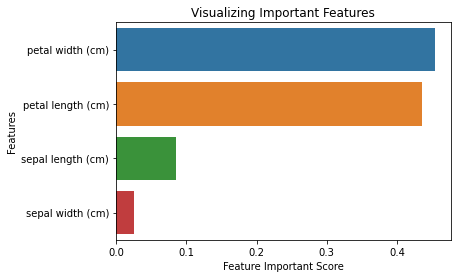

In [27]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Important Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [28]:
# Generating model on selected features

a = data[['petal_length', 'petal_width']]
b = data['species']

In [30]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size =0.3, random_state=5)

In [31]:
# Fitting the model

clf.fit(a_train, b_train)

RandomForestClassifier()

In [32]:
b_pred = clf.predict(a_test)

In [33]:
confusion_matrix(b_test, b_pred)

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 13]], dtype=int64)

In [34]:
accuracy_score(b_test, b_pred)

0.9555555555555556